In [1]:
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
real = pd.read_pickle('../data_cabspotting/cabspotting_cut.pkl')
fake = pd.read_pickle('../data_berlinmod/trips_cabspotting.pkl')

In [3]:
fake.head()

longitude  latitude  trip
user time                                              
1    2008-06-01 00:00:00.000   -47.9071  -61.7782     1
     2008-06-08 19:11:14.309   -48.7505  -62.2195     1
3    2008-06-01 00:00:00.000  -182.7210   33.6210     2
     2008-06-02 08:33:33.682  -183.3750   32.8043     3
     2008-06-02 08:33:33.683  -183.6610   33.0264     3

In [4]:
# Load the OSMNX graphs
streets = ox.load_graphml('cabspotting_streets_all.graphml', folder='../osmnx_data')
streets_small = ox.load_graphml('san_francisco_streets_all.graphml', folder='../osmnx_data')

## Simple overview (small map)

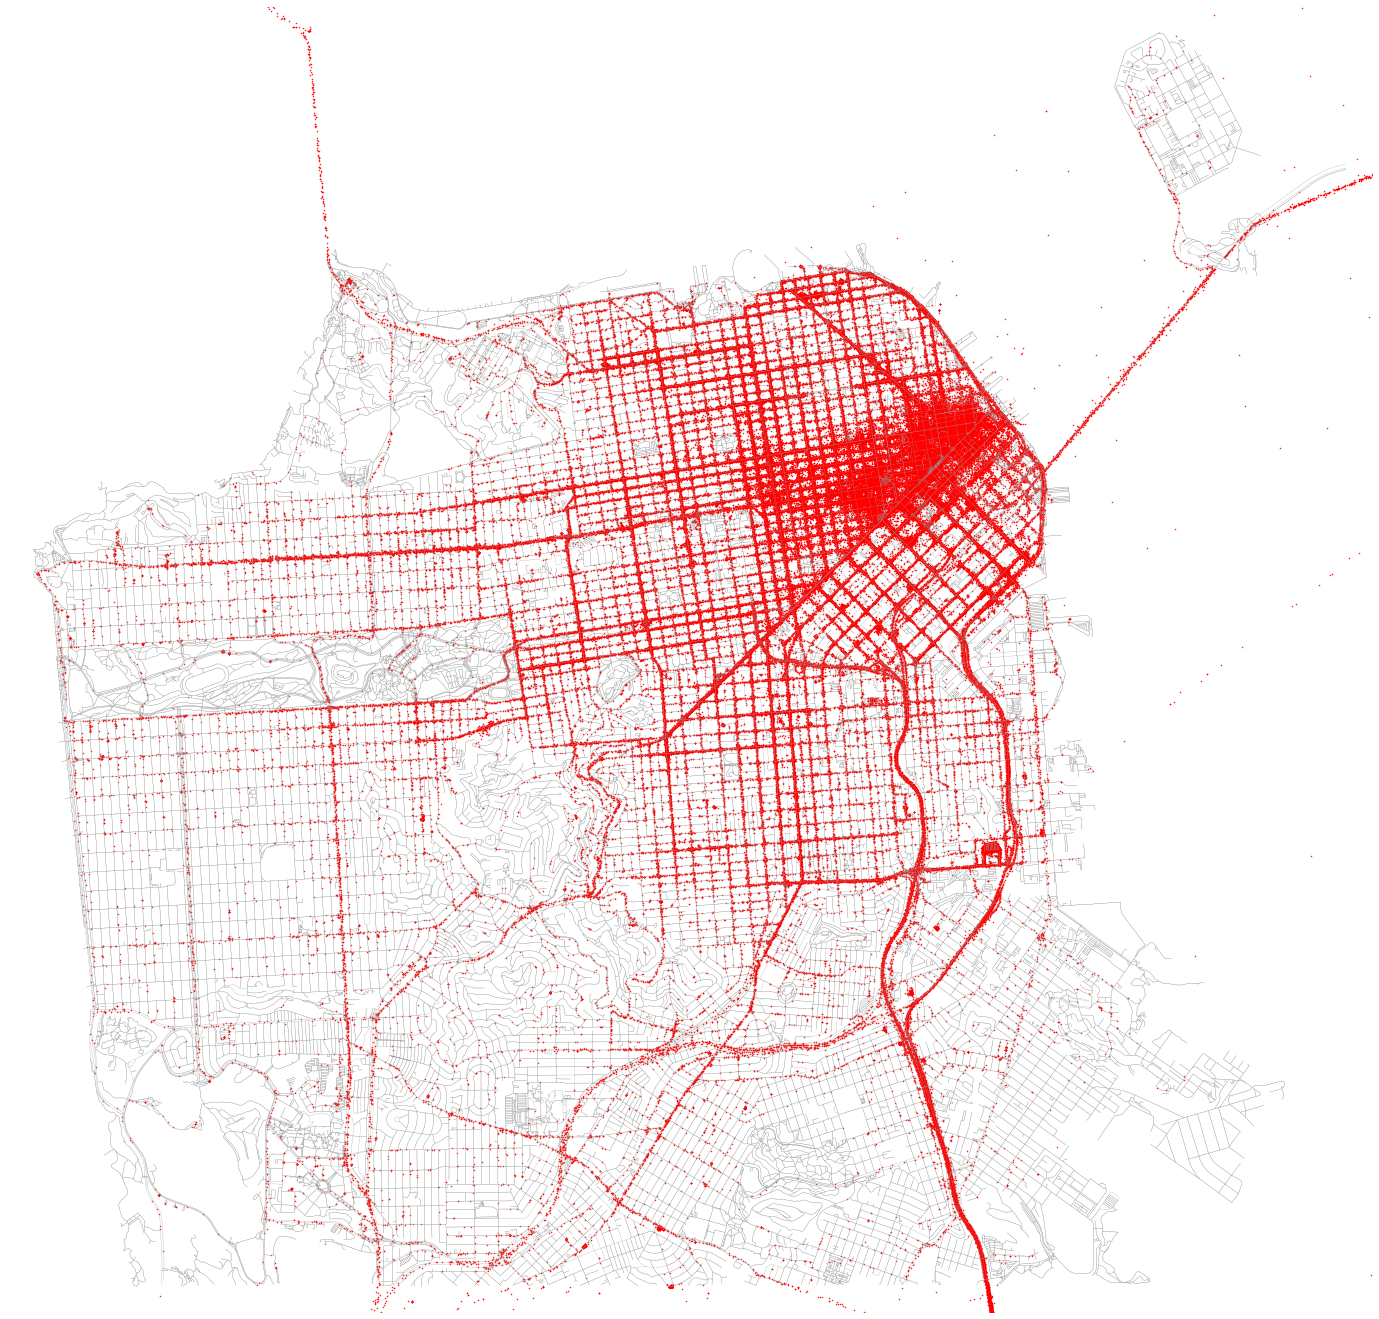

In [4]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(real['longitude'], real['latitude'], c='#ff0000', s=0.25, alpha=1.0)

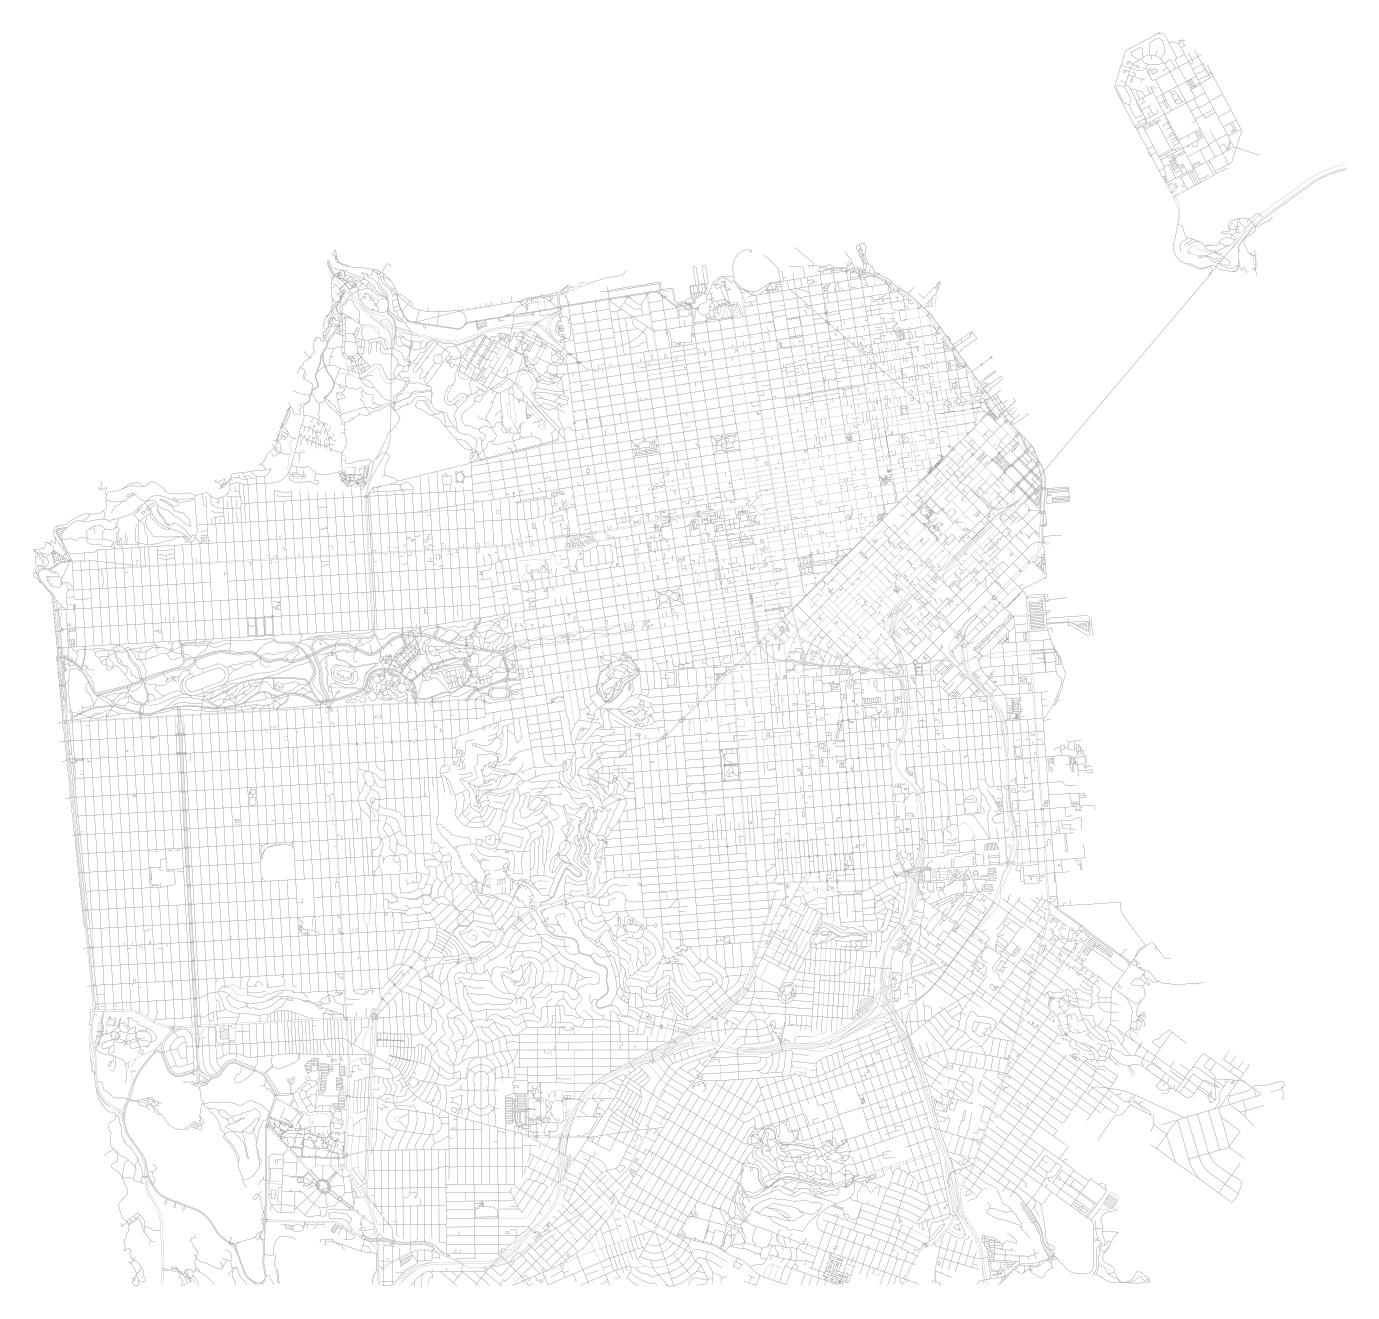

In [5]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(fake['longitude'], fake['latitude'], c='#ff0000', s=0.25, alpha=1.0)

## Simplex overview (large map)

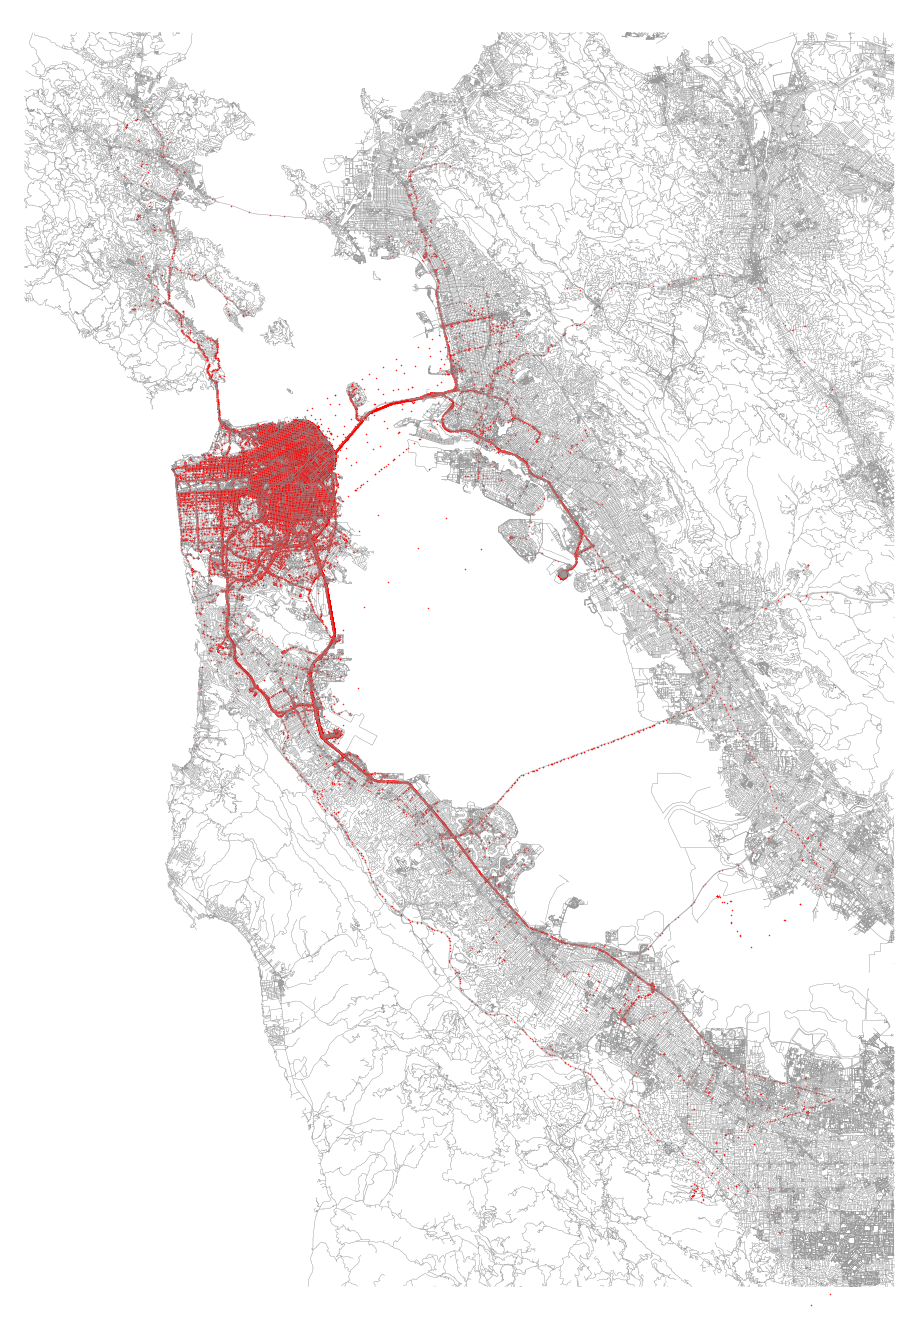

In [6]:
fig, ax = ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(real['longitude'], real['latitude'], c='#ff0000', s=0.25, alpha=1.0)

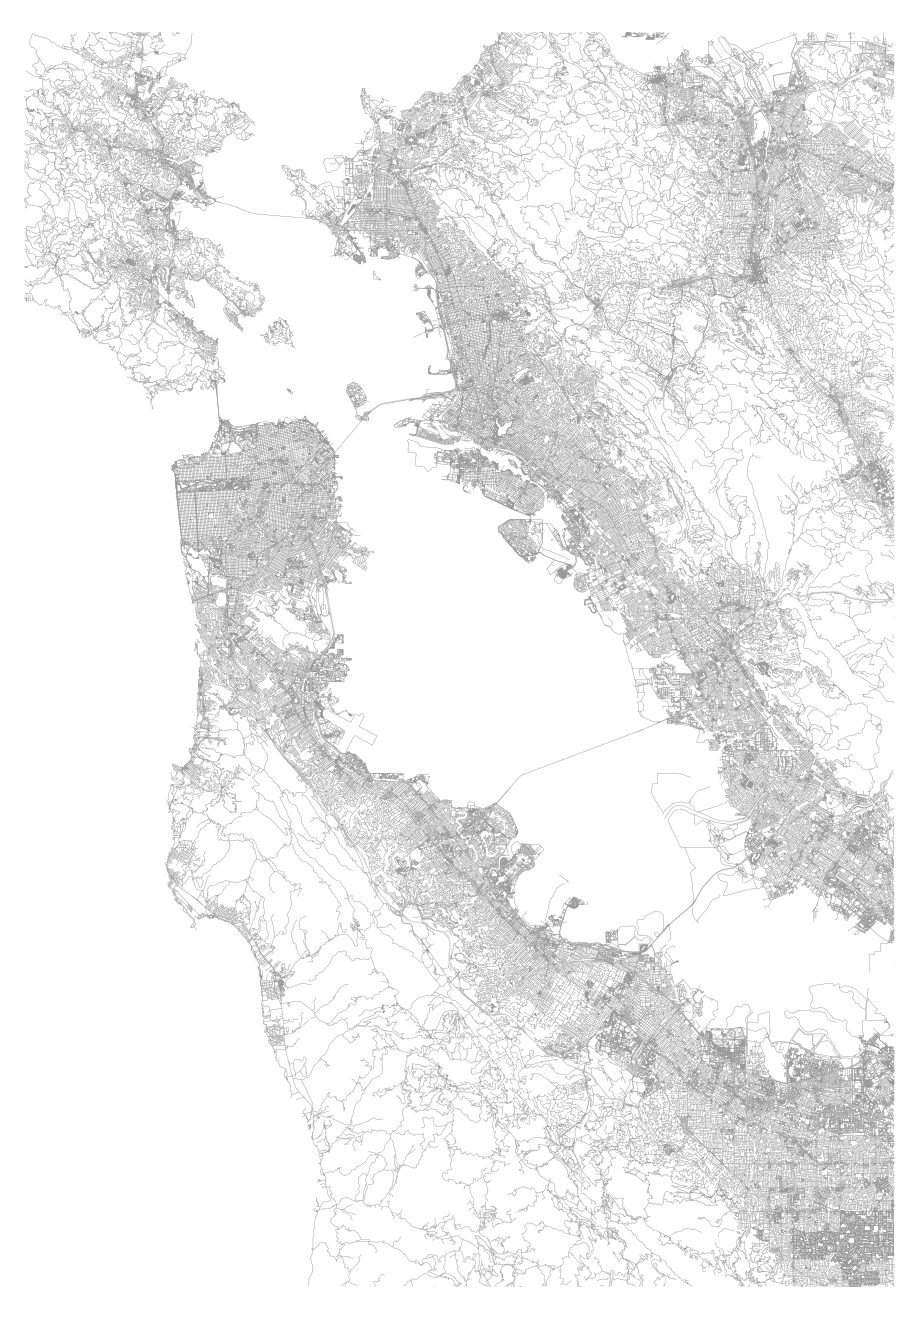

In [7]:
fig, ax = ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(fake['longitude'], fake['latitude'], c='#ff0000', s=0.25, alpha=1.0)

## Histogram of # records in every hour

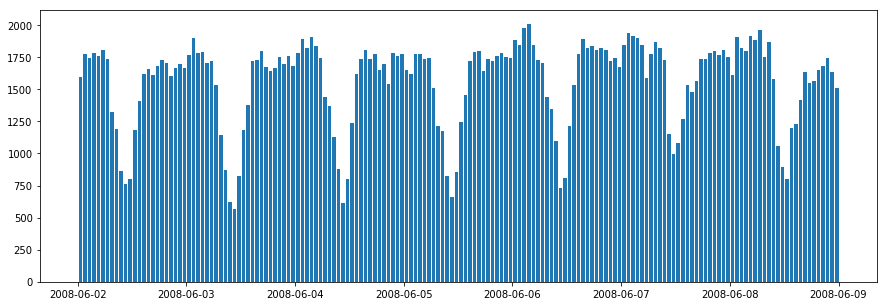

In [8]:
plt.figure(figsize=(15, 5))
plt.hist(real.index.levels[1], bins=168, edgecolor='white')
plt.show()

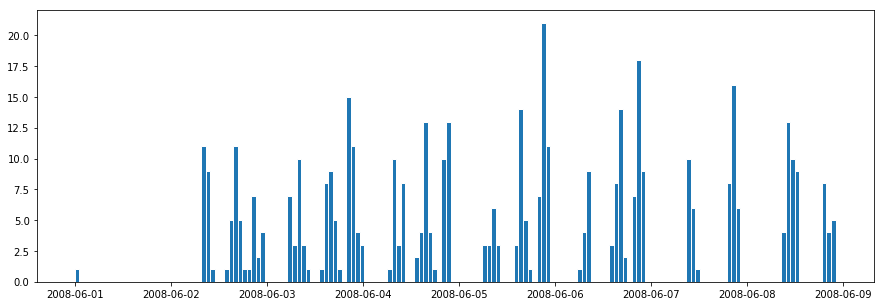

In [6]:
plt.figure(figsize=(15, 5))
plt.hist(fake.index.levels[1], bins=168, edgecolor='white')
plt.show()

## Distribution of speeds

In [7]:
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles * 1.6

def speed_distribution(ds):
    tmp = ds.reset_index()
    delta_t = tmp.groupby('user')['time'].diff().dt.total_seconds()
    delta_t = delta_t / 3600.0
    prvs_poss = tmp.groupby('user')[['latitude', 'longitude']].shift(1)
    delta_w = haversine(prvs_poss['latitude'], prvs_poss['longitude'], tmp['latitude'], tmp['longitude'])
    speeds = delta_w / delta_t
    
    print(speeds.describe())
    
    plt.figure(figsize=(15, 5))
    plt.hist(speeds, bins=range(0, 150), edgecolor='white')
    plt.show()

/Users/jankaiser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arcsin
  import sys


count    348465.000000
mean         30.417233
std        1163.740611
min           0.000000
25%           3.310669
50%          14.725242
75%          27.342158
max      614887.760159
dtype: float64


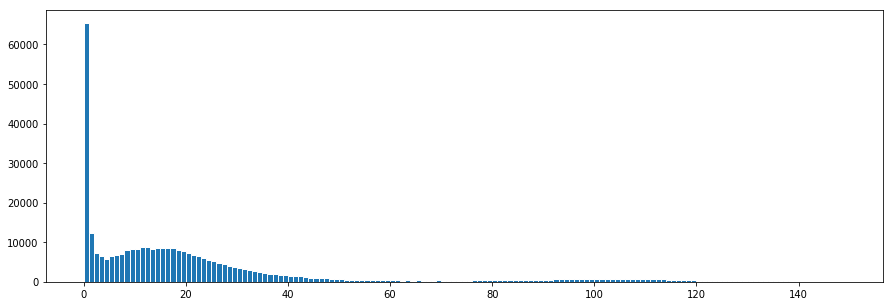

In [8]:
speed_distribution(real)

count    4.610000e+02
mean     7.786911e+07
std      1.272774e+08
min      2.080576e-01
25%      3.038729e+00
50%      1.308664e+01
75%      1.373557e+08
max      5.321811e+08
dtype: float64


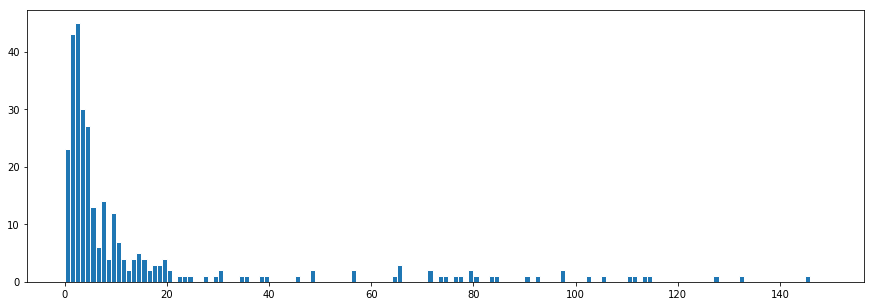

In [9]:
speed_distribution(fake)